# II.2 Génération de séquences d'observation

### II.2.a Matrices

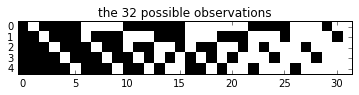

(32, 5)


In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

A0 = np.loadtxt("data_txt_compact/A0.txt") 
A1 = np.loadtxt("data_txt_compact/A1.txt") 
A7 = np.loadtxt("data_txt_compact/A7.txt") 
pi0 = np.loadtxt("data_txt_compact/vect_pi0.txt")
pi1 = np.loadtxt("data_txt_compact/vect_pi1.txt")
pi7 = np.loadtxt("data_txt_compact/vect_pi7.txt")
B0 = np.loadtxt("data_txt_compact/B0.txt") 
B1 = np.loadtxt("data_txt_compact/B1.txt") 
B7 = np.loadtxt("data_txt_compact/B7.txt") 

filename="data_txt_compact/matrice_symboles.txt"  
v=np.loadtxt(filename)
plt.title('the 32 possible observations')
plt.imshow(v,interpolation="nearest").set_cmap('gray')  
plt.show()

print B1.shape

### II.2.1 matrices

In [2]:
print("Les zeros de la matrice A correspondent aux passages d'état caché impossible.")
print("les zeros de la matrice B correspondent observations impossibles de chaque état caché")
print("Les zéros du vecteur PI correspondent aux états cachés initiaux impossibles")

Les zeros de la matrice A correspondent aux passages d'état caché impossible.
les zeros de la matrice B correspondent observations impossibles de chaque état caché
Les zéros du vecteur PI correspondent aux états cachés initiaux impossibles


### II.2.2 Génerer un état

0


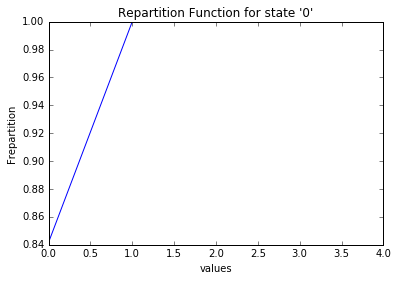

In [3]:
def genererEtat(T,qt,display=False):
    # generer un nouvel état à partir de l'état courant qt et de la matrice de transition T
    r = np.random.random()
    #print ind
    probas = T[qt,:]
    #print probas
    Frepart = np.cumsum(probas)
    #print Frepart
    i=0
    while Frepart[i]<r:
        i = i+1
    #print i
    qtpp = i
    if display:
        plt.plot(np.arange(len(probas)),Frepart)
        plt.xlabel('values')
        plt.ylabel('Frepartition')
        plt.title("Repartition Function for state '"+str(qt)+"'")
    return qtpp
    
qtpp = genererEtat(A0,0,True)
print qtpp

### II.2.3. Générer une séquence d'états cachés

In [4]:
def genererSequence(T,n):
    sequence = "0"
    qt = 0
    i=0
    while( i<n ):
        i = i+1
        qtpp = genererEtat(T,qt)
        #print i
        sequence = sequence+str(qtpp)
        qt = qtpp
        
    return sequence


In [6]:
print("some sequences of '0' :")
print(genererSequence(A0,15))
print(genererSequence(A0,15))
print(genererSequence(A0,15))

print("some sequences of '1' :")
print(genererSequence(A1,15))
print(genererSequence(A1,15))
print(genererSequence(A1,15))

print("some sequences of '7' :")
print(genererSequence(A7,15))
print(genererSequence(A7,15))
print(genererSequence(A7,15))

some sequences of '0' :
0000011112223344
0000123333333444
0000000000011111
some sequences of '1' :
0000000000122234
0112222233444444
0123444444444444
some sequences of '7' :
0000000001122222
0000000000000000
0000000000000123


### II.2.4 Générer une séquence d'observations

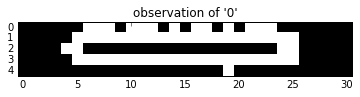

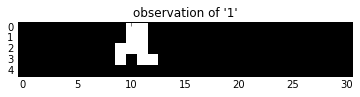

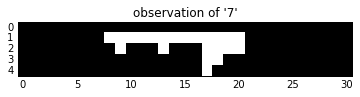

In [8]:
def genererObservation(B,sequence):
    observation = np.zeros((5,len(sequence)))
    for ind,qt in enumerate(sequence):
        qt = int(qt)
        r = np.random.random()
        probas = B[:,qt] 
        #print probas
        Frepart = np.cumsum(probas)
        #print Frepart
        i=0
        while Frepart[i]<r:
            i = i+1
        observation[:,ind] = v[:,i]
        
    return observation
        
N = 30

plt.title("observation of '0'")
plt.imshow(genererObservation(B0,genererSequence(A0,N)),interpolation="nearest").set_cmap('gray')  
plt.show()

plt.title("observation of '1'")
plt.imshow(genererObservation(B1,genererSequence(A1,N)),interpolation="nearest").set_cmap('gray')  
plt.show()

plt.title("observation of '7'")
plt.imshow(genererObservation(B7,genererSequence(A7,N)),interpolation="nearest").set_cmap('gray')  
plt.show()

## II.3 Calcul de la vraisemblance de séquences d’observations


### II.3.1 Séquences de test

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


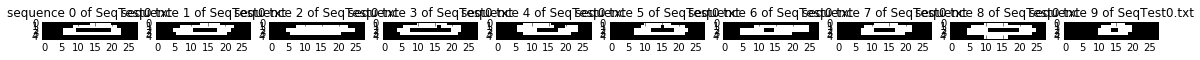

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:19: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


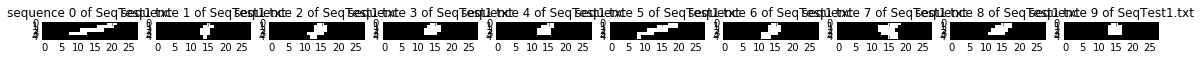

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:31: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future


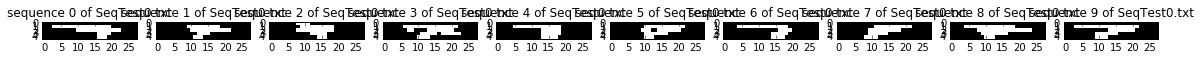

In [17]:
filename="data_txt_compact/SeqTest0.txt"
sequences0=np.loadtxt(filename)
fig, axes = plt.subplots(nrows=1, ncols=sequences.shape[0], figsize=(20,20))
for n,seq in enumerate(sequences0):
    seq_image = np.zeros((5,len(seq)))
    for i,o in enumerate(seq):
        seq_image[:,i] = v[:,o-1]
    ax = axes[n]
    ax.set_title("sequence "+str(n)+" of SeqTest0.txt")
    ax.imshow(seq_image,interpolation="nearest").set_cmap('gray')  
plt.show()
    
filename="data_txt_compact/SeqTest1.txt"
sequences1=np.loadtxt(filename)    
fig, axes = plt.subplots(nrows=1, ncols=sequences.shape[0], figsize=(20,20))
for n,seq in enumerate(sequences1):
    seq_image = np.zeros((5,len(seq)))
    for i,o in enumerate(seq):
        seq_image[:,i] = v[:,o-1]
    ax = axes[n]
    ax.set_title("sequence "+str(n)+" of SeqTest1.txt")
    ax.imshow(seq_image,interpolation="nearest").set_cmap('gray')  
plt.show()
    
filename="data_txt_compact/SeqTest7.txt"
sequences7=np.loadtxt(filename)  
fig, axes = plt.subplots(nrows=1, ncols=sequences.shape[0], figsize=(20,20))
for n,seq in enumerate(sequences7):
    seq_image = np.zeros((5,len(seq)))
    for i,o in enumerate(seq):
        seq_image[:,i] = v[:,o-1]
    ax = axes[n]
    ax.set_title("sequence "+str(n)+" of SeqTest0.txt")
    ax.imshow(seq_image,interpolation="nearest").set_cmap('gray')  
plt.show()

### II.3.2 Calcul de vraisemblance et classification

In [61]:
def vraisemblance(A,B,pi,observation):
    T = len(observation)
    Q = A.shape[0]
    alpha = np.zeros((Q,T))
    beta = np.zeros((Q,T))
    o = observation[0]
    alpha[:,0] = pi*B[o-1,:]
    for t,ot in enumerate(observation):
        if t!=0:
            #print A
            #print alpha[:,t-1][:,np.newaxis]
            #print A*alpha[:,t-1][:,np.newaxis]
            alpha[:,t] = B[ot-1,:]*np.sum(A*alpha[:,t-1][:,np.newaxis],axis=0)
    P = np.log(np.sum(alpha[:,T-1]))     
    return P

labels = [0,1,7]
y = np.asarray([])
ypredict = np.asarray([])
print("\ntest on SeqText0.txt")
for n,seq in enumerate(sequences0):
    y = np.append(y,0)
    P0 = vraisemblance(A0,B0,pi0,seq)
    P1 = vraisemblance(A1,B1,pi1,seq)
    P7 = vraisemblance(A7,B7,pi7,seq)
    print "* logP(seq"+str(n)+"/0) = ",P0
    print "* logP(seq"+str(n)+"/1) = ",P1
    print "* logP(seq"+str(n)+"/7) = ",P7
    ypredict = np.append(ypredict,labels[np.argmax([P0,P1,P7])])
    
print("\ntest on SeqText1.txt")
for n,seq in enumerate(sequences1):
    y = np.append(y,1)
    P0 = vraisemblance(A0,B0,pi0,seq)
    P1 = vraisemblance(A1,B1,pi1,seq)
    P7 = vraisemblance(A7,B7,pi7,seq)
    print "* logP(seq"+str(n)+"/0) = ",P0
    print "* logP(seq"+str(n)+"/1) = ",P1
    print "* logP(seq"+str(n)+"/7) = ",P7
    ypredict = np.append(ypredict,labels[np.argmax([P0,P1,P7])])
    
print("\ntest on SeqText7.txt")
for n,seq in enumerate(sequences7):
    y = np.append(y,7)
    P0 = vraisemblance(A0,B0,pi0,seq)
    P1 = vraisemblance(A1,B1,pi1,seq)
    P7 = vraisemblance(A7,B7,pi7,seq)
    print "* logP(seq"+str(n)+"/0) = ",P0
    print "* logP(seq"+str(n)+"/1) = ",P1
    print "* logP(seq"+str(n)+"/7) = ",P7
    ypredict = np.append(ypredict,labels[np.argmax([P0,P1,P7])])
    
from sklearn.metrics import confusion_matrix

print "\n* Confusion matrix : \n",confusion_matrix(y,ypredict)
    

            


test on SeqText0.txt
* logP(seq0/0) =  -29.2049190614
* logP(seq0/1) =  -92.7771369456
* logP(seq0/7) =  -105.438673464
* logP(seq1/0) =  -32.1360665985
* logP(seq1/1) =  -88.0612238026
* logP(seq1/7) =  -88.9451645173
* logP(seq2/0) =  -37.1828615283
* logP(seq2/1) =  -58.6067114536
* logP(seq2/7) =  -47.2568706724
* logP(seq3/0) =  -32.1626099539
* logP(seq3/1) =  -117.071502911
* logP(seq3/7) =  -114.126350679
* logP(seq4/0) =  -48.4869969865
* logP(seq4/1) =  -73.2629957164
* logP(seq4/7) =  -106.949109588
* logP(seq5/0) =  -32.1811997762
* logP(seq5/1) =  -78.0572311182
* logP(seq5/7) =  -102.869818113
* logP(seq6/0) =  -35.2738786967
* logP(seq6/1) =  -66.3628267042
* logP(seq6/7) =  -62.0650714772
* logP(seq7/0) =  -25.0295198921
* logP(seq7/1) =  -71.0401571571
* logP(seq7/7) =  -83.3099896732
* logP(seq8/0) =  -42.3337622851
* logP(seq8/1) =  -97.731092609
* logP(seq8/7) =  -97.3096913251
* logP(seq9/0) =  -21.0257475682
* logP(seq9/1) =  -34.5443125353
* logP(seq9/7) =  -55.

/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:7: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:13: DeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
